In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

In [2]:
l = 100

x, y = np.indices((l, l))

In [6]:
x

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [97, 97, 97, ..., 97, 97, 97],
       [98, 98, 98, ..., 98, 98, 98],
       [99, 99, 99, ..., 99, 99, 99]])

In [7]:
x.shape

(100, 100)

In [8]:
y

array([[ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       ...,
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99]])

In [9]:
center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

In [10]:
circle1 = (x - center1[0])**2 + (y - center1[1])**2 < radius1**2
circle2 = (x - center2[0])**2 + (y - center2[1])**2 < radius2**2
circle3 = (x - center3[0])**2 + (y - center3[1])**2 < radius3**2
circle4 = (x - center4[0])**2 + (y - center4[1])**2 < radius4**2

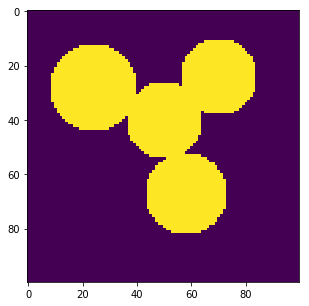

In [11]:
img = circle1 + circle2 + circle3 + circle4

plt.figure(figsize=(10, 5))
plt.imshow(img)

plt.show()

In [12]:
mask = img.astype(bool)

img = img.astype(float)

mask.shape, img.shape

((100, 100), (100, 100))

In [13]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [14]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

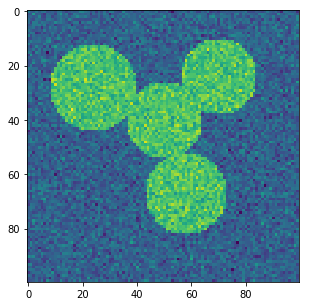

In [15]:
img += 1 + 0.2 * np.random.randn(*img.shape)

plt.figure(figsize=(10,5))
plt.imshow(img)

plt.show()

#### img_to_graph      
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.image.img_to_graph.html#sklearn.feature_extraction.image.img_to_graph   

Graph of the pixel-to-pixel gradient connections

In [16]:
graph = image.img_to_graph(img, mask=mask)

print(graph)

  (0, 1)	0.1226767768647341
  (1, 2)	0.05815163461470929
  (2, 3)	0.1876212988775281
  (3, 4)	0.3510705182694289
  (4, 5)	0.32410417064081476
  (5, 6)	0.07079131655035287
  (6, 7)	0.06364687072484898
  (7, 8)	0.07359579529520577
  (8, 9)	0.2396707699236753
  (9, 10)	0.13308815241304384
  (11, 12)	0.2672368501154234
  (12, 13)	0.22907321756092136
  (13, 14)	0.18772626395867809
  (14, 15)	0.2190447991394442
  (15, 16)	0.40722141734439354
  (16, 17)	0.538358380524945
  (17, 18)	0.1417515319972915
  (18, 19)	0.5512166644316936
  (19, 20)	0.20722752729646077
  (20, 21)	0.2684927710502869
  (21, 22)	0.14683025719216802
  (22, 23)	0.3422032148369498
  (23, 24)	0.09563113912293297
  (24, 25)	0.6773687758252613
  (26, 27)	0.06315101731780315
  :	:
  (2653, 2653)	2.1874371928148637
  (2654, 2654)	1.8616340054266822
  (2655, 2655)	2.23163390300411
  (2656, 2656)	1.8531413530357477
  (2657, 2657)	2.0057062302541677
  (2658, 2658)	1.988468591691642
  (2659, 2659)	2.015053062704891
  (2660, 2660)	2.

In [17]:
graph.shape

(2678, 2678)

In [18]:
graph.data

array([0.12267678, 0.05815163, 0.1876213 , ..., 1.81813581, 1.63733858,
       2.00430691])

### SpectralClustering
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

In [19]:
labels = spectral_clustering(graph, n_clusters=4)

labels.shape

(2678,)

In [20]:
labels

array([2, 2, 2, ..., 0, 0, 0])

In [21]:
label_im = -np.ones(img.shape)
label_im

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [22]:
label_im[mask] = labels
label_im[mask]

array([2., 2., 2., ..., 0., 0., 0.])

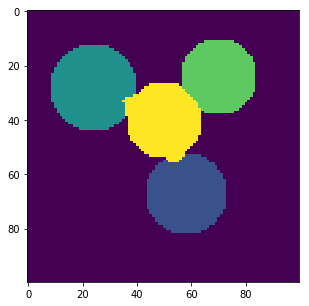

In [23]:
plt.figure(figsize=(10, 5))
plt.imshow(label_im)

plt.show()